# IR Assignment-4

# 1. Data Loading
Load the dataset and show its info and statistics

In [9]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.shape

(5728, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df.columns

Index(['text', 'spam'], dtype='object')

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5695, 2)


In [7]:
# to show the number of missing data
print(df.isnull().sum())

text    0
spam    0
dtype: int64


# 2. Data Visualization
Visualize dataset features frequencies to get some insights

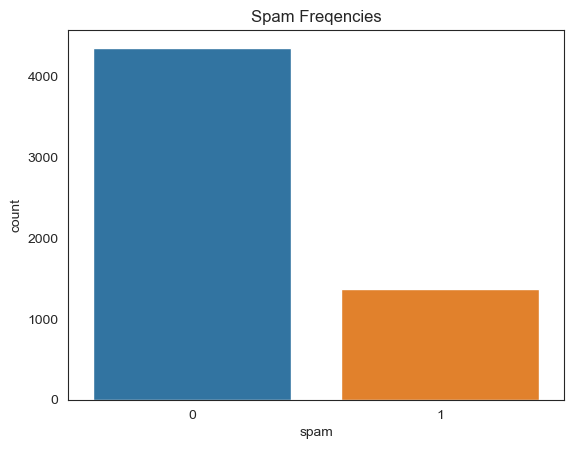

In [11]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(df['spam'])
plt.title("Spam Freqencies")
plt.show()

In [8]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['text'])

In [12]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['spam'], test_size=0.20, random_state=0)
print(message.shape)

(5695, 37229)


In [0]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [14]:
print(classifier.predict(xtrain))

[0 0 0 ... 0 0 0]


In [15]:
print(ytrain.values)

[0 0 0 ... 0 0 0]


In [17]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3445   12]
 [   1 1098]]
Accuracy: 
 0.9971466198419666


In [18]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [19]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[862   8]
 [  1 268]]
Accuracy: 
 0.9920983318700615


# Accuracy: 
 0.9920983318700615